In [3]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow",tf.__version__)

tensorflow 2.0.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x,_),(test_x,_) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print("max pixel : ",train_x.max())
print("min pixel : ",train_x.min())

max pixel :  255
min pixel :  0


### 데이터 전처리

In [8]:
train_x = (train_x - 127.5) / 127.5
print("max pixel : ",train_x.max())
print("min pixel : ",train_x.min())

max pixel :  1.0
min pixel :  -1.0


In [9]:
train_x = train_x.reshape(train_x.shape[0],28,28,1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

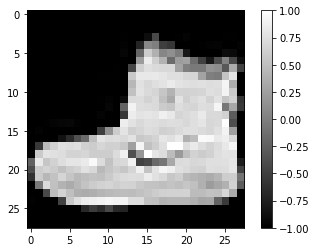

In [10]:
#첫번째 이미지가 꺼내보기
plt.imshow(train_x[0].reshape(28,28),cmap='gray')
plt.colorbar()
plt.show()

In [19]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)